# **Project Overview**
## Business Context & Objective

The Chief Marketing Officer (CMO) of a leading retail e-commerce platform is concerned about increasing customer attrition, which negatively impacts average order value and customer lifetime value (CLV). The goal of this project is to develop a predictive model to identify customers at high risk of churning. The insights will inform proactive retention strategies, such as personalized offers and targeted communications, to boost loyalty and profitability.

# **Dataset Description**
## Dataset Overview

The dataset contains transactional and behavioral data for customers, with the following columns:

• **CustomerID:** Unique customer identifier

• **Churn:** Churn flag (target variable)

• **Tenure:** Customer tenure with the organization

• **PreferredLoginDevice:** Preferred device for login

• **CityTier:** City tier classification

• **WarehouseToHome:** Distance from warehouse to home

• **PreferredPaymentMode:** Preferred payment method

• **Gender:** Customer gender

• **HourSpendOnApp:** Hours spent on the app or website

• **NumberOfDeviceRegistered:** Number of devices registered

• **PreferedOrderCat:** Preferred order category in the last month

• **SatisfactionScore:** Customer satisfaction score

• **MaritalStatus:** Marital status

• **NumberOfAddress:** Number of addresses added

• **Complain:** Whether a complaint was raised in the last month

• **OrderAmountHikeFromlastYear:** % increase in order amount from last year

• **CouponUsed:** Number of coupons used in the last month

• **OrderCount:** Number of orders placed in the last month

• **DaySinceLastOrder:** Days since last order

• **CashbackAmount:** Average cashback in the last month

# Importing Libraries

We import essential libraries for data manipulation, visualization, and machine learning.  
- `pandas` and `numpy` for data handling  
- `matplotlib` and `seaborn` for visualization  
- `sklearn` for preprocessing, model building, and evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Uploading and Loading the Dataset

We upload the dataset to the Colab environment and load it into a pandas DataFrame for analysis.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (2).xlsx


In [ ]:
# Loading the Excel file
df = pd.read_excel('data.xlsx')

# Displaying the first few rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002.0,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003.0,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004.0,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005.0,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data Exploration

We begin by exploring the dataset to understand its structure and quality:

- **df.info()**: Displays the data types, number of entries, and non-null counts for each column, helping us identify potential data type issues or missing values.
- **df.isnull().sum()**: Checks for missing values in each column, which is important for deciding on data cleaning strategies.
- **df.describe()**: Provides summary statistics (mean, std, min, max, quartiles) for the numerical features, allowing us to spot outliers or unusual distributions.
- **Churn Distribution Plot**: Visualizes the distribution of the target variable (`Churn`) to check for class imbalance, which can impact model training and evaluation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5628 non-null   float64
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5628 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

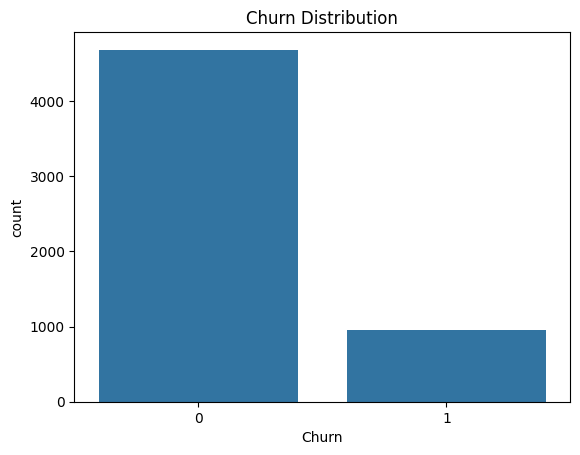

In [ ]:
# Basic info
df.info()

# Checking for missing values
df.isnull().sum()

# Describe numerical features
df.describe()

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Data Preprocessing

We prepare the data for modeling through several key steps:

- **Handling Missing Values:**  
  We remove rows with missing values using `df.dropna()`. Alternatively, imputation methods (such as forward fill) can be used depending on the data and business context.

- **Encoding Categorical Variables:**  
  Categorical columns are converted into numerical format using label encoding, making them suitable for machine learning algorithms.

- **Feature and Target Selection:**  
  We separate the features (independent variables) from the target variable (`Churn`). The `CustomerID` column is dropped as it does not contribute to prediction.

- **Train-Test Split:**  
  The data is split into training and testing sets, with 20% reserved for testing. Stratification ensures the target variable's distribution is maintained in both sets.

- **Feature Scaling:**  
  We standardize the features using `StandardScaler` to ensure all variables contribute equally to the model and to improve algorithm performance.

In [ ]:
# Fill or drop missing values as appropriate
df = df.dropna()

# Encoding categorical variables
categorical_cols = [
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
    'PreferedOrderCat', 'MaritalStatus'
]
df_encoded = df.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop(['CustomerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

We train a Random Forest Classifier on the preprocessed training data.  
Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for improved accuracy and robustness.  
This step fits the model to the training data, allowing it to learn patterns that distinguish between customers who churn and those who do not.

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Model Evaluation

We evaluate the performance of the trained Random Forest model on the test set using several metrics:

- **Predictions:**  
  The model predicts churn labels and probabilities for the test data.

- **Classification Report:**  
  Displays precision, recall, F1-score, and accuracy for each class, providing a detailed assessment of model performance.

- **Confusion Matrix:**  
  Visualizes the number of true positives, true negatives, false positives, and false negatives, helping us understand the types of errors the model makes.

- **ROC-AUC Score:**  
  Measures the model's ability to distinguish between classes. A higher ROC-AUC indicates better performance.

- **ROC Curve:**  
  Plots the true positive rate against the false positive rate at various thresholds, providing a visual representation of the model's discriminative ability.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       628
           1       0.94      0.85      0.89       126

    accuracy                           0.97       754
   macro avg       0.95      0.92      0.94       754
weighted avg       0.97      0.97      0.96       754



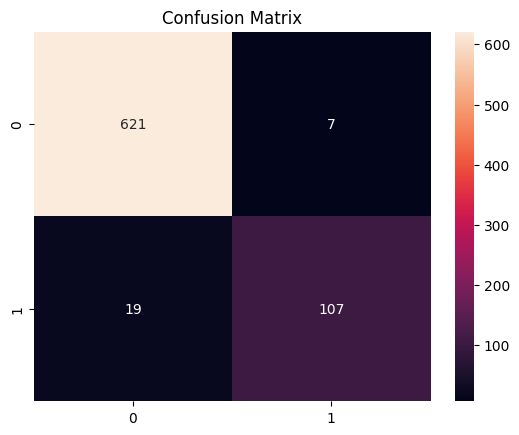

ROC-AUC Score: 0.99


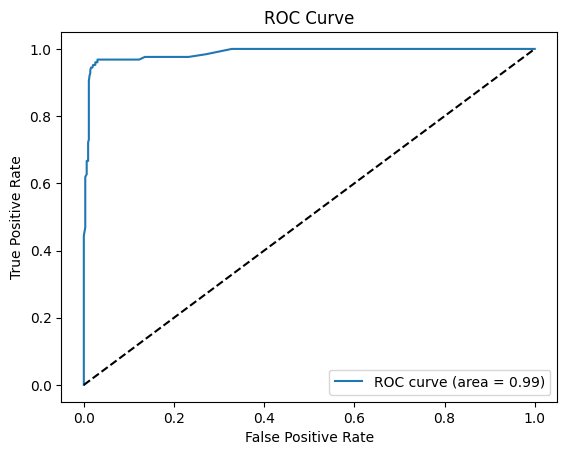

In [ ]:
# Predictions
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance

We analyze and visualize the importance of each feature as determined by the Random Forest model.  
Feature importance scores indicate how much each variable contributes to the model’s predictions.  
Understanding which features are most influential helps identify key drivers of customer churn and provides actionable business insights.

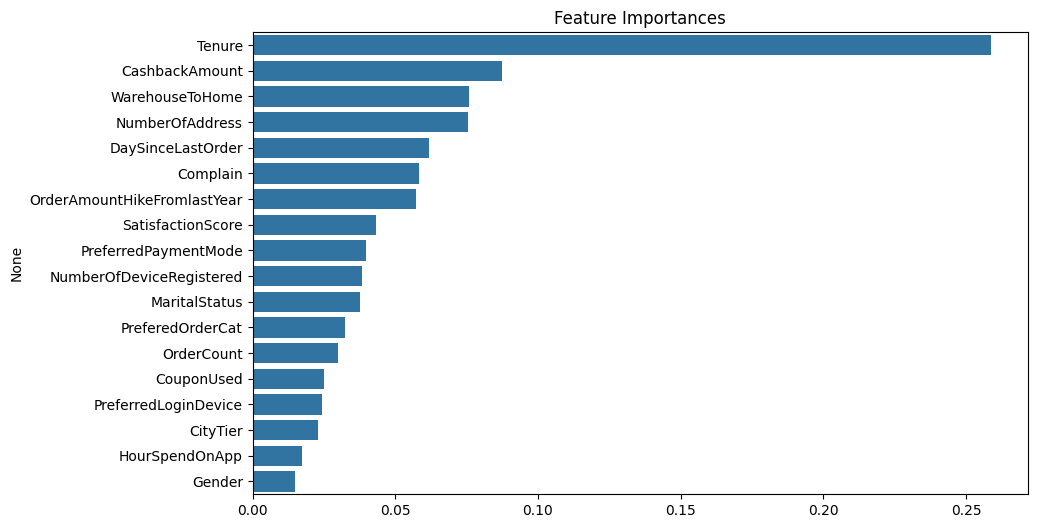

In [ ]:
# Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()